In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def eden_cluster(n: int):
    # init
    global X, Y
    X = [0]
    Y = [0]
    exist_set = set([(0, 0)])
    possible_set = set([
        (1, 0),
        (0, 1),
        (-1, 0),
        (0, -1)
    ])

    # grow
    for i in range(n-1):
        possible_list = list(possible_set)
        choice = possible_list[np.random.randint(len(possible_list))]
        exist_set.add(choice)

        nextx = choice[0]
        nexty = choice[1]
        X.append(nextx)
        Y.append(nexty)

        possible_set = set(possible_list)
        possible_set.add((nextx+1, nexty))
        possible_set.add((nextx, nexty+1))
        possible_set.add((nextx-1, nexty))
        possible_set.add((nextx, nexty-1))
        possible_set = possible_set - exist_set


def DLA_cluster(n: int):
    # init
    global X, Y
    X = [0]
    Y = [0]
    exist_set = set([(0, 0)])
    possible_set = set([
        (1, 0),
        (0, 1),
        (-1, 0),
        (0, -1)
    ])

    # grow
    for i in range(n-1):
        # random init point
        direction = np.random.randint(4)  # choose area, 0: right, 1: up, 2: left, 3: down
        if direction == 0:
            random_x = np.random.randint(max(X)+1, max(X)+5)
            random_y = np.random.randint(min(Y)-5, max(Y)+5)
        elif direction == 1:
            random_x = np.random.randint(min(X)-5, max(X)+5)
            random_y = np.random.randint(max(Y)+1, max(Y)+5)
        elif direction == 2:
            random_x = np.random.randint(min(X)-5, min(X)-1)
            random_y = np.random.randint(min(Y)-5, max(Y)+5)
        else:
            random_x = np.random.randint(min(X)-5, max(X)+5)
            random_y = np.random.randint(min(Y)-5, min(Y)-1)

        # random walk
        while True:
            if (random_x, random_y) in possible_set:
                choice = (random_x, random_y)
                exist_set.add(choice)
                X.append(random_x)
                Y.append(random_y)

                possible_set.add((random_x+1, random_y))
                possible_set.add((random_x, random_y+1))
                possible_set.add((random_x-1, random_y))
                possible_set.add((random_x, random_y-1))
                possible_set = possible_set - exist_set
                break
            else:
                direction = np.random.random()
                if direction < 0.5:
                    random_x += np.random.choice([-1, 1])
                else:
                    random_y += np.random.choice([-1, 1])

            # if random walk out of range, walk along the edge
            if random_x > i+2:
                random_x = i+2
            if random_x < -i-2:
                random_x = -i-2
            if random_y > i+2:
                random_y = i+2
            if random_y < -i-2:
                random_y = -i-2


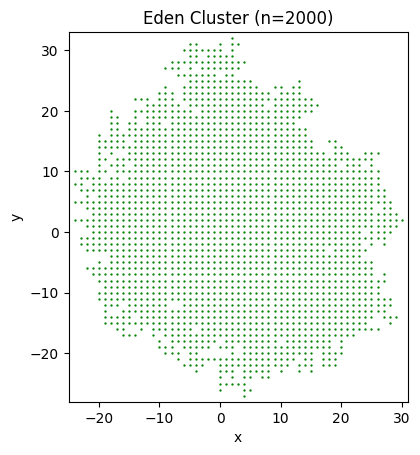

In [2]:
# eden cluster
num = 2000
eden_cluster(num)


# plot
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Eden Cluster (n=%d)' % num)

ax.set_aspect('equal')
ax.scatter(X, Y, s=20/np.sqrt(len(X)), c='g')
ax.set_xlim(min(X)-1, max(X)+1)
ax.set_ylim(min(Y)-1, max(Y)+1)
plt.show()


In [ ]:
# DLA cluster
num = 1000
# DLA_cluster(num)


# plot
fig, ax = plt.subplots()
ax.set_title('DLA Cluster (n=%d)' % num)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(min(X)-2, max(X)+2)
ax.set_ylim(min(Y)-2, max(Y)+2)
ax.set_aspect('equal')

ax.scatter(X, Y, s=20/np.sqrt(num), c='g')

plt.tight_layout()
plt.show()


In [ ]:
# save DLA_cluster_1000 data to txt file
np.savetxt('DLA_cluster_1000.txt', np.array([X, Y]).T, fmt='%d')


In [ ]:
# FuncAnimation
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.set_xlim(min(X)-2, max(X)+2)
ax.set_ylim(min(Y)-2, max(Y)+2)

scat = ax.scatter(0, 0, s=20/np.sqrt(num), c='g')


def update(i):
    ax.set_title('DLA Cluster (n=%d)' % i)
    ax.scatter(X[:i], Y[:i], s=20/np.sqrt(num), c='g')
    return scat


ani = FuncAnimation(fig=fig, func=update, frames=500, interval=20)
ani.save('DLA_cluster.gif', writer='pillow', fps=60)


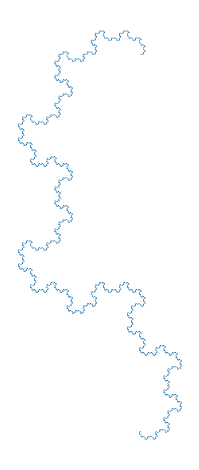

In [10]:
def iterate(sequence: str) -> str:
    sequence = sequence + 'R' + swapLetters(sequence[::-1])
    return sequence


def swapLetters(sequence: str) -> str:
    newSequence = ""
    for letter in sequence:
        if letter == 'R':
            newSequence = newSequence + 'L'
        else:
            newSequence = newSequence + 'R'
    return newSequence


def dragon(n_iterations: int) -> str:
    """Takes in a number n, an return the dragon curve sequence i.e.:
    When n=2, returns "RRL"
    Args:
        n_iterations (int): number of iterations of the dragon curve
    Returns:
        str: The dragon curve Sequence
    """
    initial_sequence = 'R'
    for i in range(0, n_iterations):
        initial_sequence = iterate(initial_sequence)
    return initial_sequence


theta = 0
iter_num = 20
l = 1 / (iter_num ** 2 + 1)
X = [0, l]
Y = [0, 0]

for element in dragon(iter_num):
    if element == 'R':
        theta += np.pi / 3
        X.append(X[-1] + l*np.cos(theta))
        Y.append(Y[-1] + l*np.sin(theta))
    else:
        theta -= np.pi / 3
        X.append(X[-1] + l*np.cos(theta))
        Y.append(Y[-1] + l*np.sin(theta))


# plot
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.axis("off")


ax.plot(X, Y, lw=4/iter_num)


plt.tight_layout()
plt.savefig('./pic/dragon_curve.png')

plt.show()


In [ ]:
np.warnings.filterwarnings("ignore")


def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j


def is_stable(c, num_iterations):
    z = 0
    for _ in range(num_iterations):
        z = z ** 2 + c
    return abs(z) <= 2


def get_members(c, num_iterations):
    mask = is_stable(c, num_iterations)
    return c[mask]


c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
members = get_members(c, num_iterations=20)

fig, ax = plt.subplots()
# ax.set_title('Mandelbrot Set')
ax.imshow(is_stable(c, num_iterations=20), cmap='binary')
ax.set_aspect("equal")
ax.axis("off")
plt.tight_layout()
plt.show()


In [12]:
import imageio.v2 as iio
import numpy as np


def fractal_dimension(Z: np.ndarray, threshold=0.8) -> float:
    """
    Returns the Minkowski-Bouligand dimension, i.e., box-counting dimension of a 2D array.

    Input:
        `Z`: 2D array to be analysed.
        `threshold`: Cutoff for converting values in Z to 1 and 0.
    Returns:
        The estimated box counting dimension.
    """
    assert (len(Z.shape) == 2)  # Only for 2d image

    def boxcount(Z: np.ndarray, k) -> int:
        S = np.add.reduceat(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0), np.arange(0, Z.shape[1], k), axis=1)
        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])

    Z = (Z < threshold)  # Transform Z into a binary array

    p = min(Z.shape)                        # Minimal dimension of image
    n = int(np.floor(np.log(p)/np.log(2)))    # Greatest power of 2 less than or equal to p
    sizes = 2**np.arange(n, 1, -1)          # Build successive box sizes (from 2**n down to 2**1)

    counts = []  # Actual box counting with decreasing size
    for size in sizes:
        counts.append(boxcount(Z, size))

    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)  # Fit the successive log(sizes) with log (counts)
    return -coeffs[0]


I = iio.imread("./pic/sierpinski.png", as_gray="True") / 255.0  # Import the image in gray scale
print("Minkowski-Bouligand dimension (computed): ", fractal_dimension(I))
print("Haussdorf dimension (theoretical):        ", (np.log(3)/np.log(2)))


Minkowski-Bouligand dimension (computed):  1.5855963935652113
Haussdorf dimension (theoretical):         1.5849625007211563


In [13]:
I = iio.imread("./pic/mandelbrot_set_binary.png", as_gray="True") / 255.0  # Import the image in greyscale
print("Minkowski-Bouligand dimension (computed): ", fractal_dimension(I))


Minkowski-Bouligand dimension (computed):  1.2227381097255214


In [14]:
I = iio.imread("./pic/DLA_cluster_1000_without_frame.png", as_gray="True") / 255.0  # Import the image in greyscale
print("Minkowski-Bouligand dimension (computed): ", fractal_dimension(I))


Minkowski-Bouligand dimension (computed):  1.4469893169898411


In [15]:
I = iio.imread("./pic/sierpinski_carpet.png", as_gray="True") / 255.0  # Import the image in greyscale
print("Minkowski-Bouligand dimension (computed): ", fractal_dimension(I))
print("Haussdorf dimension (theoretical):        ", (np.log(8)/np.log(3)))


Minkowski-Bouligand dimension (computed):  1.8498916452191487
Haussdorf dimension (theoretical):         1.892789260714372


In [16]:
I = iio.imread("./pic/dragon_curve.png", as_gray="True") / 255.0  # Import the image in greyscale
print("Minkowski-Bouligand dimension (computed): ", fractal_dimension(I))
print("Haussdorf dimension (theoretical):        ", (np.log(8)/np.log(3)))


Minkowski-Bouligand dimension (computed):  1.2046153917741886
Haussdorf dimension (theoretical):         1.892789260714372
